In [3]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
#load the dataset
tips=sns.load_dataset('tips')


In [29]:
#preprocessing
#converting categorical variables to dummy variables
tips=pd.get_dummies(tips,drop_first=True)

#selecting features and targets 
X=tips.drop('tip',axis=1)
y=tips['tip']

#splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

#standarding the dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#building the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),#input layer,
    tf.keras.layers.Dense(32,activation='relu'),#hidden layer,
    tf.keras.layers.Dense(1)#output layer
])

#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#fit the model
history=model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1,validation_data=(X_test,y_test))

#evaluate the model
loss=model.evaluate(X_test,y_test,verbose=0)
loss



Epoch 1/50
6/6 [==============================] - 1s 33ms/step - loss: 7.2865 - mae: 2.3338 - val_loss: 6.4626 - val_mae: 2.1836
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 5.5907 - mae: 1.9665 - val_loss: 4.8419 - val_mae: 1.8024
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 4.0413 - mae: 1.5960 - val_loss: 3.4871 - val_mae: 1.4467
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 2.9111 - mae: 1.3003 - val_loss: 2.4412 - val_mae: 1.1414
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 2.1005 - mae: 1.0637 - val_loss: 1.8142 - val_mae: 0.9536
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 1.6062 - mae: 0.9642 - val_loss: 1.5697 - val_mae: 0.9001
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 1.4521 - mae: 0.9270 - val_loss: 1.5422 - val_mae: 0.9376
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 1.3536 - mae: 0.9019 - val_loss:

[1.4451277256011963, 0.8541104197502136]

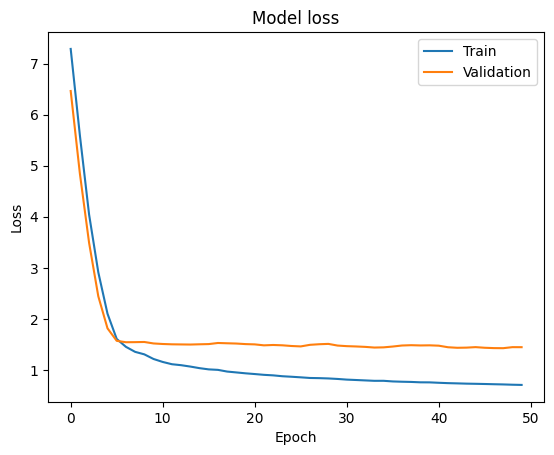

In [30]:
#plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Early stopping callback